In [9]:
import os
import glob
import cv2
import numpy as np 

jpg_files = glob.glob(os.path.join("*.jpg"))
n=6
y_data = [] #索引
filter_data = [] #滤波器
rell_number_data = [] #卷轴号
date_data = [] #日期
hour_data = [] #时
minute_data = [] #分
seconds_data = [] #秒
for n in range(2,7):
    img = cv2.imread(jpg_files[n])
    y_data.append(jpg_files[n]) #list 索引列
    cropped_img = img[:, 1800:, :] #信息数据集
    rotated_img = cv2.rotate(cropped_img, cv2.ROTATE_90_COUNTERCLOCKWISE) #旋转
    filter_img = rotated_img[:, 100:400, :] #滤波器
    filter_data.append(filter_img)
    rell_number_img = rotated_img[0:100, 400:800, :] #卷轴号
    rell_number_data.append(rell_number_img)
    date_img = rotated_img[100:, 400:800, :] #日期
    date_data.append(date_img)
    hour_img = rotated_img[:, 800:1000, :] #时
    hour_data.append(hour_img)
    minute_img = rotated_img[:, 1000:1200, :] #分
    minute_data.append(minute_img)
    seconds_img = rotated_img[:, 1200:1300, :] #秒
    seconds_data.append(seconds_img)



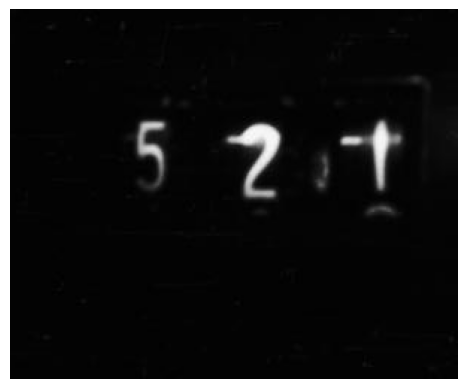

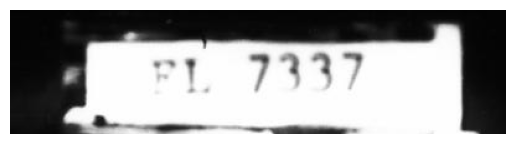

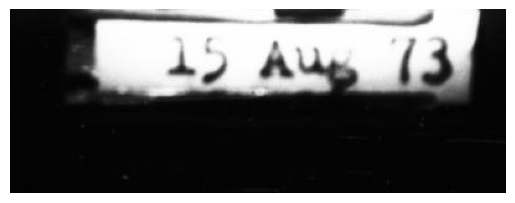

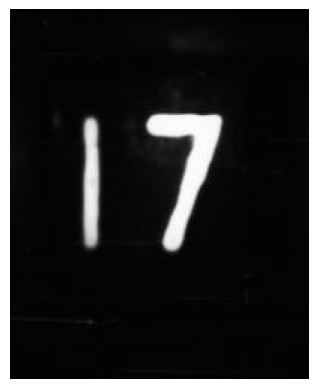

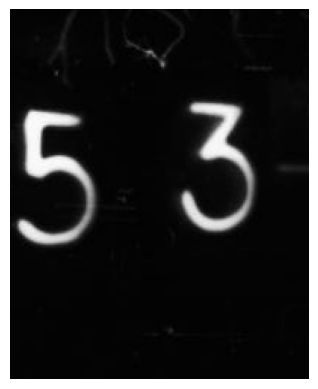

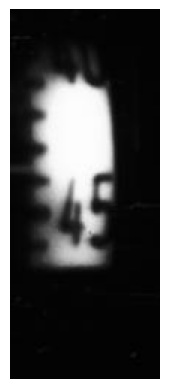

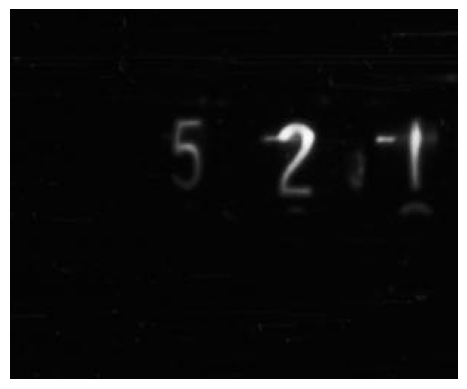

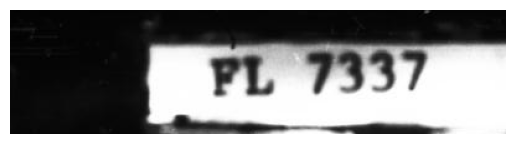

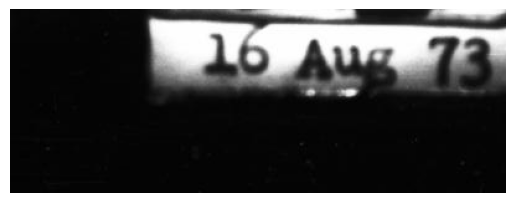

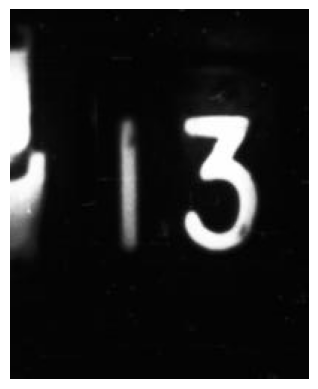

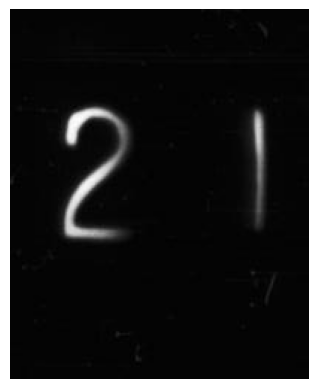

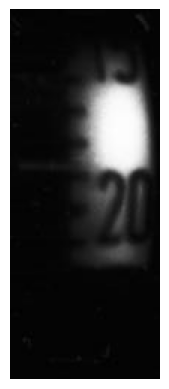

In [58]:
import matplotlib.pyplot as plt
list_img=[filter_data,rell_number_data,date_data,hour_data,minute_data,seconds_data]#
for j in range(2):#有几张图片最大就是几
    for i in range(6):#分成了6部分，6个数据集
        plt.imshow(list_img[i][j], cmap='gray')
        plt.axis('off')
        plt.show()

In [ ]:
#Function to change image shape
def tran(list):
    processed_imgs = []
    for img in list:
      resized_img = cv2.resize(img, (64, 32))
      gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
      gray_img_reshaped = gray_img.reshape((32, 64, 1))
      gray_img_float = gray_img_reshaped.astype(np.float32) 
      processed_imgs.append(gray_img_float)
    processed_imgs_array = np.array(processed_imgs, dtype=np.float32)
    #arr_normalized = (processed_imgs_array - processed_imgs_array.mean()) / processed_imgs_array.std()#归一化
    return processed_imgs_array


In [60]:
#Change image shape
for im in range(len(list_img)):
    list_img[im] = tran(list_img[im])


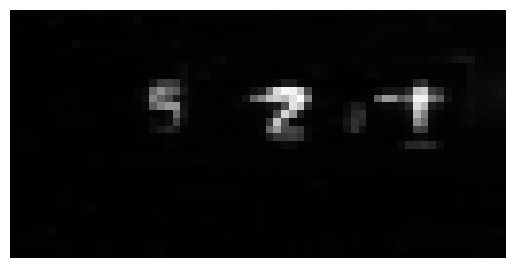

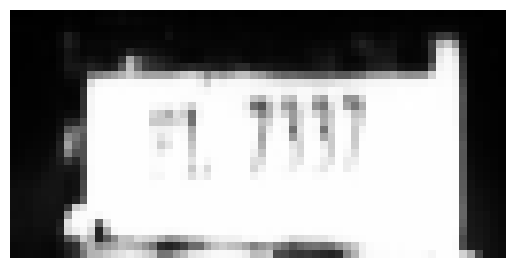

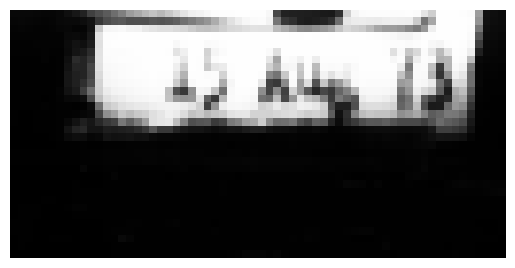

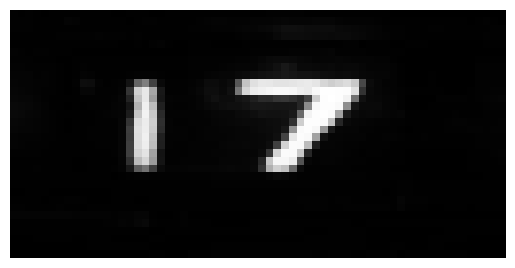

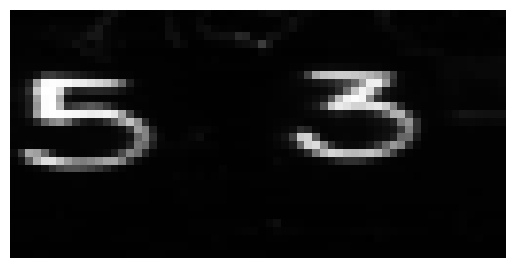

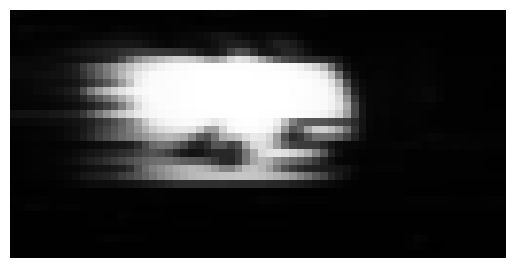

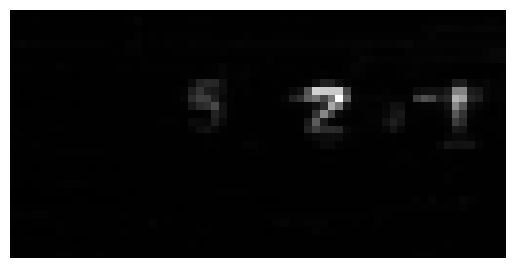

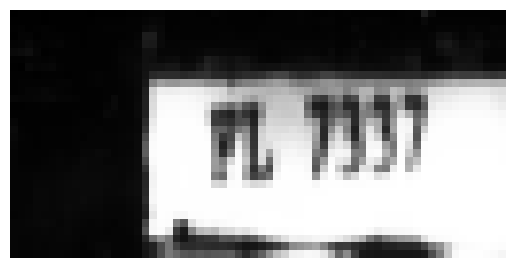

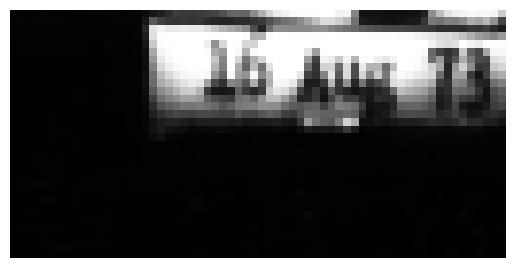

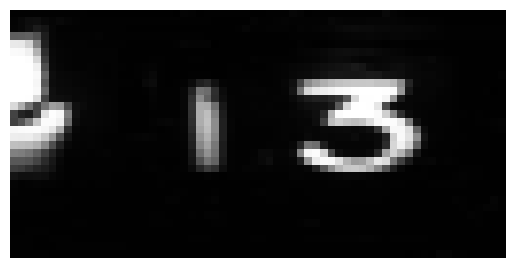

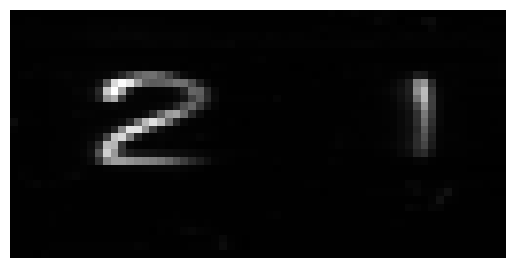

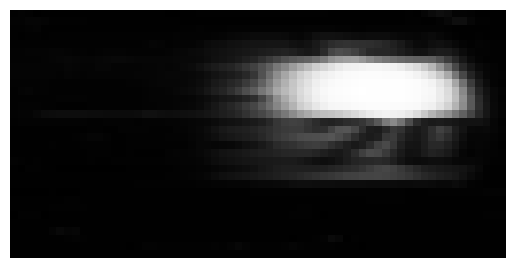

In [61]:
for j in range(2):#有几张图片最大就是几
    for i in range(6):#分成了6部分，6个数据集
        plt.imshow(list_img[i][j], cmap='gray')
        plt.axis('off')
        plt.show()

In [11]:
from tensorflow.keras.models import model_from_json

# 首先，重新定义ctc_lambda_func
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

# 加载模型架构
with open('E:/pythonfile/model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json, custom_objects={'<ctc_lambda_func>': ctc_lambda_func})

# 加载权重
loaded_model.load_weights('E:/pythonfile/my_model_weights.h5')

In [12]:
alphabets = u"0123456789-"

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret

In [13]:
import cv2
import numpy as np

processed_imgs = []
for img in filter_data:
    resized_img = cv2.resize(img, (64, 32))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    gray_img_reshaped = gray_img.reshape((32, 64, 1))
    gray_img_float = gray_img_reshaped.astype(np.float32) 
    processed_imgs.append(gray_img_float)
processed_imgs_array = np.array(processed_imgs, dtype=np.float32)
#arr_normalized = (processed_imgs_array - processed_imgs_array.mean()) / processed_imgs_array.std()#归一化


In [62]:
import tensorflow as tf
from tensorflow.keras import backend as K
list_prediction=[]
for ilen in range(len(list_img)):
    preds = loaded_model.predict(list_img[ilen])
    decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

    prediction = []
    img_size=5
    for i in range(img_size):
        prediction.append(num_to_label(decoded[i]))
    
    list_prediction.append(prediction)



-438


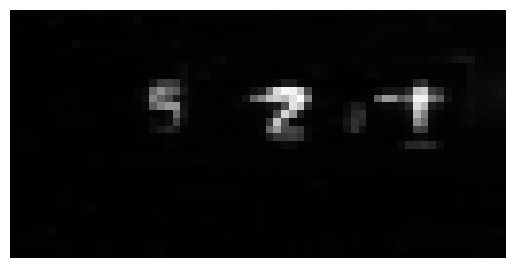

050


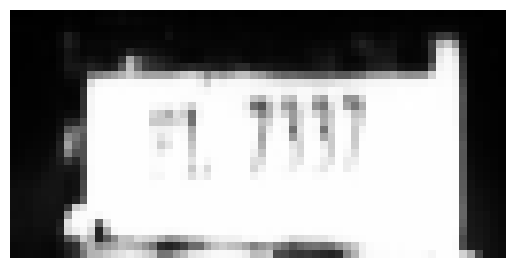

3894


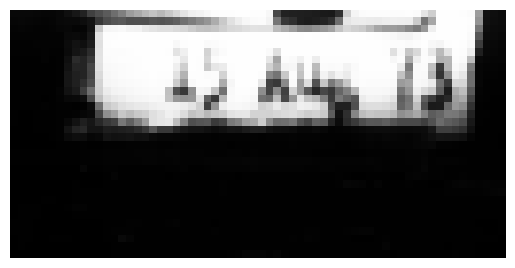

-544


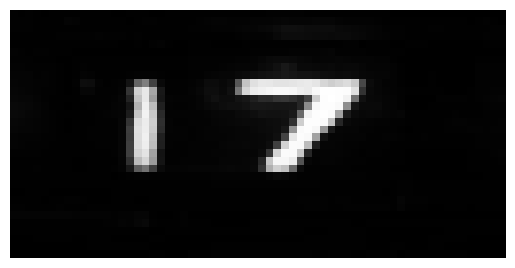

3511


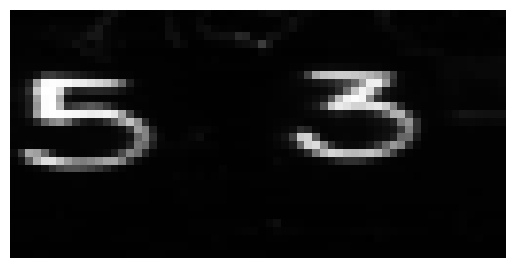

3064


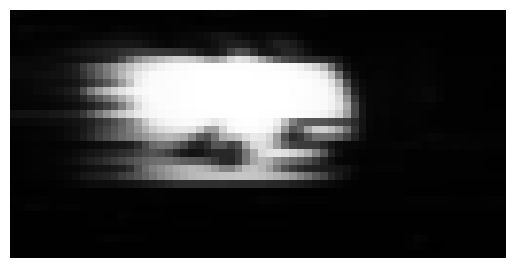

263


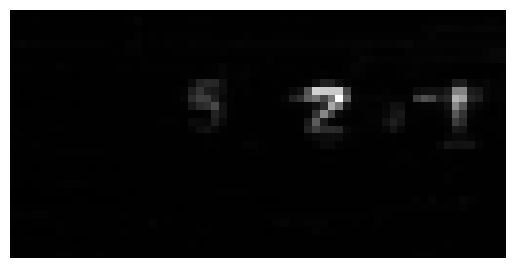

-392


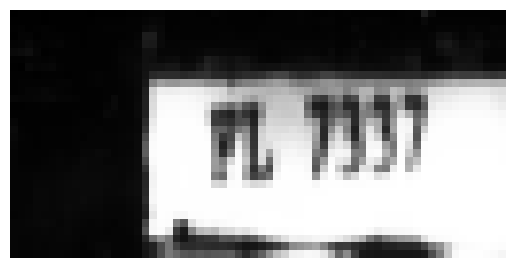

-894


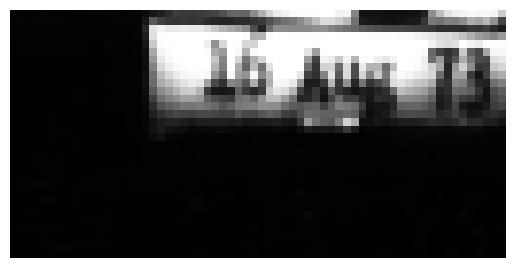

2174


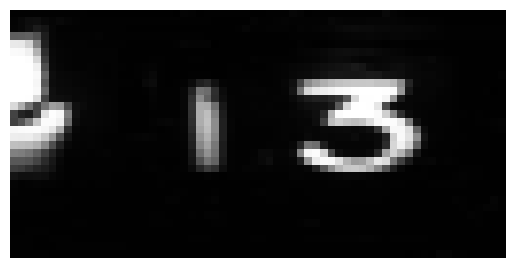

3351


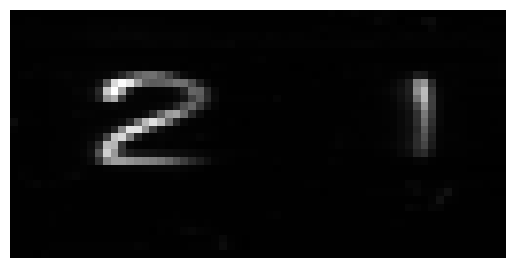

872


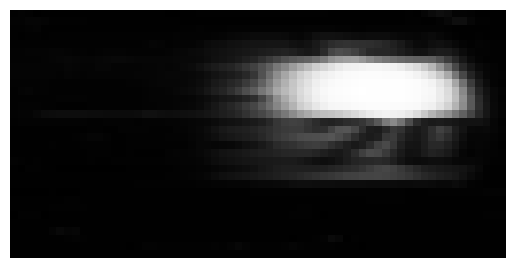

In [65]:
for j in range(2):#有几张图片最大就是几
    for i in range(6):#分成了6部分，6个数据集
        plt.imshow(list_img[i][j], cmap='gray')
        print(list_prediction[i][j])
        plt.axis('off')
        plt.show()